<!-- ## Ironhack Kaggle 

### Machine Learning - Predict Sales for Various Stores

### Libraries  -->

# Libraries

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

<!-- ### Loading the dataset -->

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")
df.head(10)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647
5,5,914,6,2014-10-04,877,1,0,0,0,7967
6,6,1022,3,2013-06-05,789,1,1,0,0,7101
7,8,90,3,2013-02-06,941,1,1,0,0,7516
8,9,860,1,2013-10-21,718,1,1,0,0,6295
9,10,356,4,2014-06-26,317,1,0,0,0,3511


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [47]:
df.shape

(640840, 10)

In [48]:
df.isnull().sum()

True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
dtype: int64

<!-- ### Preprocessing -->

In [ ]:
# Feature Engineering 
# Converting to date
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["WeekOfYear"] = df["Date"].dt.isocalendar().week
df["Weekday"] = df["Date"].dt.weekday # 0 will be Monday and 6 = Sunday.

In [50]:
# sns.pairplot(df, hue="Sales")
# plt.show()

<!-- Now I am going to use dummies -->

In [51]:
# Categorical
df = pd.get_dummies(df, columns=["State_holiday"], drop_first=True)

# Dropping all unnecessary columns
df.drop(columns=["Date"], inplace=True)

<!-- Splitting Features and Target -->

In [52]:
features = df.drop(columns=["Sales"])
target = df["Sales"]

## Train-Test Split

<!-- ### Train-Test Split
Now performing the division between Train and Test, we will reserve 20% of our data to Test -->

In [53]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# Model Selections 
I am trying out different models to review which one predicts the best.

Normalize Features

In [54]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Training & Evaluation

In [55]:
models = {
    "RandomForest": RandomForestRegressor(random_state=0),
    "GradientBoosting": GradientBoostingRegressor(random_state=0),
    "KNN": KNeighborsRegressor(n_neighbors=10)}

results = []

for name, model, in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2 })

# Displaying the results 
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)

              Model           MSE         RMSE        R2
0      RandomForest  8.033573e+05   896.301988  0.946073
1  GradientBoosting  1.592257e+06  1261.846752  0.893116
2               KNN  3.198119e+06  1788.328565  0.785319


**Review about the best model**
Best Model: RandomForestRegressor
- Here's why: Lowest MSE: It has the smallest average squared error between predicted and true sales.
- Lowest RMSE: Its prediction errors are closest to zero on average.
- Highest R²: It explains 94.6% of the variance in the target variable, which is excellent for a regression model.

# Testing the Model

In [62]:
# Best Model 
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

new_test = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv")

In [67]:
new_test.head(30)

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,School_holiday,Month,Year,Day,WeekOfYear,State_holiday_a,State_holiday_b,State_holiday_c
0,7,764,4,2013-12-26,0,0,0,1,12,2013,26,52,False,False,True
1,19,22,3,2013-05-22,449,1,0,1,5,2013,22,21,False,False,False
2,31,1087,6,2013-06-29,622,1,0,0,6,2013,29,26,False,False,False
3,45,139,6,2013-08-17,314,1,0,0,8,2013,17,33,False,False,False
4,56,568,1,2014-04-07,356,1,0,0,4,2014,7,15,False,False,False
5,57,1056,6,2015-06-20,522,1,0,0,6,2015,20,25,False,False,False
6,61,12,3,2014-12-31,609,1,0,1,12,2014,31,1,False,False,False
7,63,76,1,2014-06-23,882,1,0,0,6,2014,23,26,False,False,False
8,79,605,4,2013-10-17,448,1,0,0,10,2013,17,42,False,False,False
9,81,820,6,2013-11-23,996,1,0,0,11,2013,23,47,False,False,False


In [63]:
# Same preprocessing as on the test data
new_test["Date"] = pd.to_datetime(new_test["Date"])
new_test["Month"] = new_test["Date"].dt.month
new_test["Year"] = new_test["Date"].dt.year
new_test["Day"] = new_test["Date"].dt.day
new_test["WeekOfYear"] = new_test["Date"].dt.isocalendar().week

In [68]:
new_test = pd.get_dummies(new_test, columns=["State_holiday_a", "State_holiday_b", "State_holiday_c"], drop_first=True)
new_test = new_test.drop(columns=["Date", "Store_ID"])
new_test = new_test.reindex(columns=x_train.columns, fill_value=0)

In [69]:
new_test_scaled = scaler.transform(new_test)
predictions = best_model.predict(new_test_scaled)

In [70]:
# Exporting the predictions
submission = pd.DataFrame({"Predicted_Sales": predictions})
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv


<!-- ### Testing Model -->

## Visualisations

### Distribution of Sales

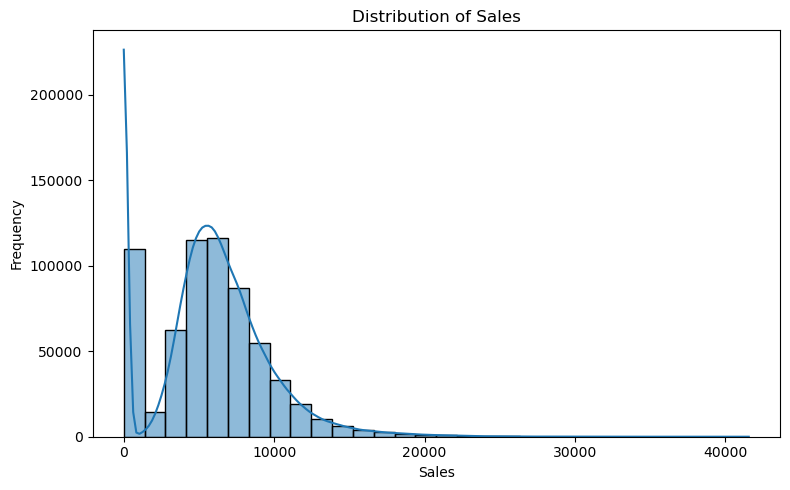

In [73]:
plt.figure(figsize=(8, 5))
sns.histplot(target, bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Sales vs. Number of Customers

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


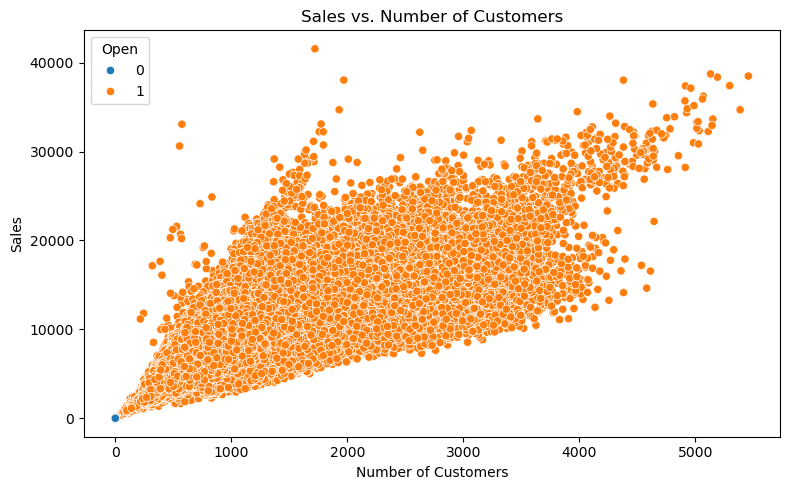

In [75]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=features["Nb_customers_on_day"], y=target, hue=features["Open"])
plt.title("Sales vs. Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

### Actual vs. Predicted (on the test set)

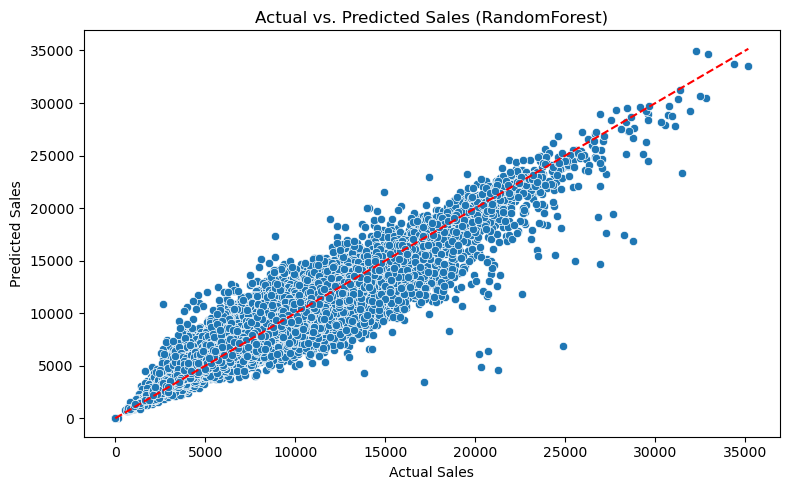

In [76]:
y_pred = best_model.predict(x_test_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title(f"Actual vs. Predicted Sales ({best_model_name})")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.tight_layout()
plt.show()
